In [4]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from datetime import datetime
import os
from dotenv import load_dotenv


In [5]:
load_dotenv()

token = os.getenv("TOKEN")
# Define the base URL for the API
base_url = "https://data.cityofnewyork.us/resource/8h9b-rp9u.json"

# Define headers including the app token
headers = {
    'X-App-Token': token
}

# Function to handle pagination, fetch all data, and implement a delay between requests
def fetch_all_data(base_url, headers, start_date, end_date):
    limit = 50000  # Adjust the limit as needed, depending on what the API allows
    offset = 0
    full_data = []

    # Format start and end dates for the API call
    formatted_start_date = datetime.strptime(start_date, "%Y-%m-%d").strftime('%Y-%m-%dT%H:%M:%S.%f')
    formatted_end_date = datetime.strptime(end_date, "%Y-%m-%d").strftime('%Y-%m-%dT%H:%M:%S.%f')

    while True:
        # Construct the query with pagination and date filtering
        query_url = f"{base_url}?$limit={limit}&$offset={offset}" \
                    f"&$where=ARREST_DATE between '{formatted_start_date}' and '{formatted_end_date}'"
        
        response = requests.get(query_url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch data: HTTP Status Code {response.status_code}")
            break
        
        data = response.json()
        if not data:
            break  # Break the loop if no more data is returned
        
        full_data.extend(data)
        offset += limit
        
        # Sleep for 1 seconds before making the next request
        sleep(1)
    
    return full_data

# Set your desired date range
start_date = '2014-01-01'
end_date = '2023-12-31'

# Fetch all data using the defined function
all_data = fetch_all_data(base_url, headers, start_date, end_date)

# Create a DataFrame from the fetched data
try :
    historical_df = pd.DataFrame(all_data)
except:
    print("Something went wrong....")

In [6]:
# Show 2023 arrest record DataFrame
historical_df.dropna(axis=1)
historical_df

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,lon_lat
0,94273780,2014-01-01T00:00:00.000,397,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105,ROBBERY,PL 1601001,F,B,44,0,<18,M,BLACK,1006032.0,243764.0,40.83573258000007,-73.92128542599994,"{'type': 'Point', 'coordinates': [-73.92128542..."
1,94272165,2014-01-01T00:00:00.000,205,"TRESPASS 2, CRIMINAL",352,CRIMINAL TRESPASS,PL 1401500,M,M,26,2,25-44,M,BLACK,996014.0,236126.0,40.814787465000045,-73.95750196499995,"{'type': 'Point', 'coordinates': [-73.95750196..."
2,94273806,2014-01-01T00:00:00.000,750,RESISTING ARREST,359,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2053000,M,K,60,2,25-44,M,BLACK,986860.0,149123.0,40.57599199300005,-73.99060607299998,"{'type': 'Point', 'coordinates': [-73.99060607..."
3,94272052,2014-01-01T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,B,41,0,25-44,F,WHITE,1012777.0,237339.0,40.81807858500007,-73.89693760899996,"{'type': 'Point', 'coordinates': [-73.89693760..."
4,94259980,2014-01-01T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,2,25-44,M,WHITE HISPANIC,1010896.0,244231.0,40.837001024000074,-73.90370600899996,"{'type': 'Point', 'coordinates': [-73.90370600..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502237,279734477,2023-12-31T00:00:00.000,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,Q,107,0,25-44,M,ASIAN / PACIFIC ISLANDER,1050164,203112,40.723928,-73.762197,"{'type': 'Point', 'coordinates': [-73.762197, ..."
2502238,279757488,2023-12-31T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,K,68,0,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,977714,169136,40.630914,-74.023544,"{'type': 'Point', 'coordinates': [-74.023544, ..."
2502239,279760036,2023-12-31T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,48,0,25-44,F,BLACK HISPANIC,1015053,247070,40.844774,-73.888668,"{'type': 'Point', 'coordinates': [-73.888668, ..."
2502240,279763279,2023-12-31T00:00:00.000,117,RECKLESS ENDANGERMENT 1,126,MISCELLANEOUS PENAL LAW,PL 1202500,F,Q,115,0,25-44,M,WHITE HISPANIC,1018032,214171,40.754464,-73.878064,"{'type': 'Point', 'coordinates': [-73.878064, ..."


In [7]:
# Remove unwanted columns
historical_df.drop(columns=['pd_cd', 'arrest_key','law_cat_cd','law_code','pd_desc','x_coord_cd', 'y_coord_cd', 'ky_cd','arrest_precinct','jurisdiction_code' ], inplace=True)

In [8]:
# Rename Columns
new_column_names = {
    'arrest_date': 'Arrest date',
    'ofns_desc': 'Offense description',
    'arrest_boro': 'Arrest boro',
    'age_group': 'Age group',
    'perp_sex': 'Sex',
    'perp_race': 'Race',
    'latitude': 'Latitude',
    'longitude': 'Longitude'
}
historical_df.rename(columns=new_column_names,inplace=True)

In [9]:
historical_df

,Arrest date,Offense description,Arrest boro,Age group,Sex,Race,Latitude,Longitude,lon_lat
0,2014-01-01T00:00:00.000,ROBBERY,B,<18,M,BLACK,40.83573258000007,-73.92128542599994,"{'type': 'Point', 'coordinates': [-73.92128542..."
1,2014-01-01T00:00:00.000,CRIMINAL TRESPASS,M,25-44,M,BLACK,40.814787465000045,-73.95750196499995,"{'type': 'Point', 'coordinates': [-73.95750196..."
2,2014-01-01T00:00:00.000,OFFENSES AGAINST PUBLIC ADMINISTRATION,K,25-44,M,BLACK,40.57599199300005,-73.99060607299998,"{'type': 'Point', 'coordinates': [-73.99060607..."
3,2014-01-01T00:00:00.000,FELONY ASSAULT,B,25-44,F,WHITE,40.81807858500007,-73.89693760899996,"{'type': 'Point', 'coordinates': [-73.89693760..."
4,2014-01-01T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,B,25-44,M,WHITE HISPANIC,40.837001024000074,-73.90370600899996,"{'type': 'Point', 'coordinates': [-73.90370600..."
...,...,...,...,...,...,...,...,...,...
2502237,2023-12-31T00:00:00.000,CRIMINAL MISCHIEF & RELATED OF,Q,25-44,M,ASIAN / PACIFIC ISLANDER,40.723928,-73.762197,"{'type': 'Point', 'coordinates': [-73.762197, ..."
2502238,2023-12-31T00:00:00.000,FELONY ASSAULT,K,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,40.630914,-74.023544,"{'type': 'Point', 'coordinates': [-74.023544, ..."
2502239,2023-12-31T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,B,25-44,F,BLACK HISPANIC,40.844774,-73.888668,"{'type': 'Point', 'coordinates': [-73.888668, ..."
2502240,2023-12-31T00:00:00.000,MISCELLANEOUS PENAL LAW,Q,25-44,M,WHITE HISPANIC,40.754464,-73.878064,"{'type': 'Point', 'coordinates': [-73.878064, ..."


In [10]:
# Save data to file
historical_df.to_csv('./output/2023_data.csv', index=False)

In [11]:
historical_df_from_file = pd.read_csv("./output/2023_data.csv")
historical_df_from_file

,Arrest date,Offense description,Arrest boro,Age group,Sex,Race,Latitude,Longitude,lon_lat
0,2014-01-01T00:00:00.000,ROBBERY,B,<18,M,BLACK,40.835733,-73.921285,"{'type': 'Point', 'coordinates': [-73.92128542..."
1,2014-01-01T00:00:00.000,CRIMINAL TRESPASS,M,25-44,M,BLACK,40.814787,-73.957502,"{'type': 'Point', 'coordinates': [-73.95750196..."
2,2014-01-01T00:00:00.000,OFFENSES AGAINST PUBLIC ADMINISTRATION,K,25-44,M,BLACK,40.575992,-73.990606,"{'type': 'Point', 'coordinates': [-73.99060607..."
3,2014-01-01T00:00:00.000,FELONY ASSAULT,B,25-44,F,WHITE,40.818079,-73.896938,"{'type': 'Point', 'coordinates': [-73.89693760..."
4,2014-01-01T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,B,25-44,M,WHITE HISPANIC,40.837001,-73.903706,"{'type': 'Point', 'coordinates': [-73.90370600..."
...,...,...,...,...,...,...,...,...,...
2502237,2023-12-31T00:00:00.000,CRIMINAL MISCHIEF & RELATED OF,Q,25-44,M,ASIAN / PACIFIC ISLANDER,40.723928,-73.762197,"{'type': 'Point', 'coordinates': [-73.762197, ..."
2502238,2023-12-31T00:00:00.000,FELONY ASSAULT,K,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,40.630914,-74.023544,"{'type': 'Point', 'coordinates': [-74.023544, ..."
2502239,2023-12-31T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,B,25-44,F,BLACK HISPANIC,40.844774,-73.888668,"{'type': 'Point', 'coordinates': [-73.888668, ..."
2502240,2023-12-31T00:00:00.000,MISCELLANEOUS PENAL LAW,Q,25-44,M,WHITE HISPANIC,40.754464,-73.878064,"{'type': 'Point', 'coordinates': [-73.878064, ..."


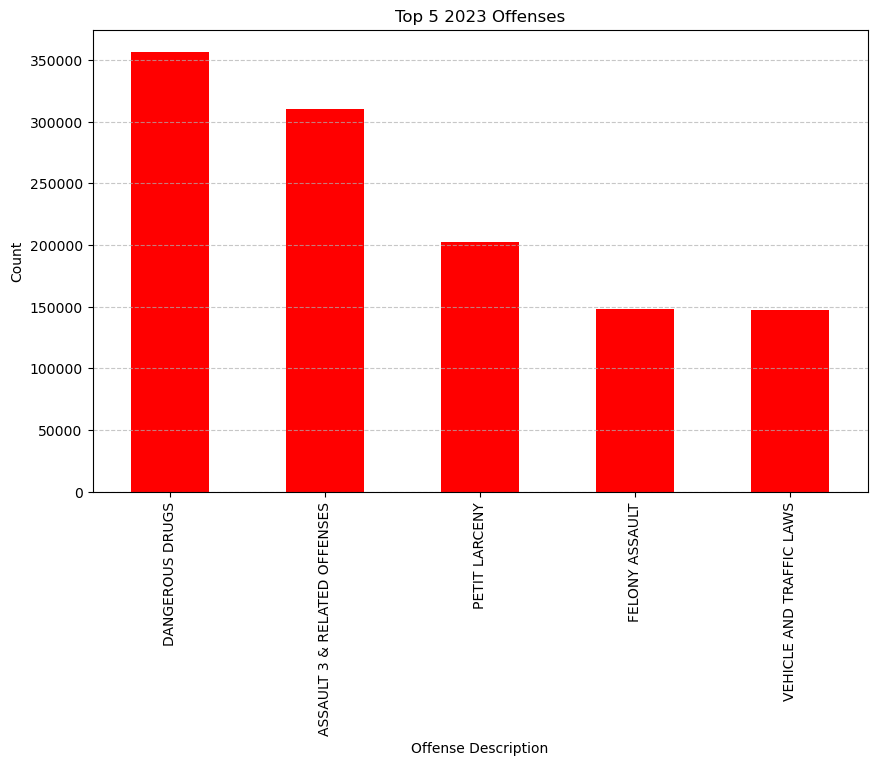

In [23]:
offense_counts_2023 = historical_df_from_file['Offense description'].value_counts()

# Sort offenses by counts in descending order
sorted_offenses = offense_counts_2023.sort_values(ascending=False)

# Select the top 5 offenses
top_3_offenses = sorted_offenses.head(5)

# Plot the top 3 offenses
plt.figure(figsize=(10, 6))
top_3_offenses.plot(kind='bar', color='red')
plt.title('Top 5 2023 Offenses')
plt.xlabel('Offense Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Set the base URL
base_url = "https://data.cityofnewyork.us/resource/uip8-fykc.json?"
# Set the query URL
query_url = base_url + "$limit=50000"
response = requests.get(query_url).json()
# Create a DataFrame
try:
    ytd_df = pd.DataFrame(response)
except : 
    print("Something went wrong...")
# Display original df
ytd_df

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,280255493,2024-01-10T00:00:00.000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601001,F,M,26,...,996342,236149,40.814845,-73.956312,"{'type': 'Point', 'coordinates': [-73.956312, ...",37,4,23,17,12424
1,279805419,2024-01-02T00:00:00.000,157,RAPE 1,104,RAPE,PL 1303501,F,K,77,...,1003509,185018,40.6744956865259,-73.9305713255961,"{'type': 'Point', 'coordinates': [-73.93057132...",16,2,49,49,17615
2,279895750,2024-01-03T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,...,1026836,180689,40.662526,-73.846499,"{'type': 'Point', 'coordinates': [-73.846499, ...",62,3,41,64,15314
3,280809090,2024-01-19T00:00:00.000,511,"CONTROLLED SUBSTANCE, POSSESSI",235,DANGEROUS DRUGS,PL 2200300,M,B,49,...,1027430,251104,40.855793,-73.843908,"{'type': 'Point', 'coordinates': [-73.843908, ...",59,5,12,32,11270
4,280357135,2024-01-11T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,K,81,...,1002457,192292,40.694456,-73.934343,"{'type': 'Point', 'coordinates': [-73.934343, ...",69,2,49,52,18181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,283662436,2024-03-12T00:00:00.000,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,K,84,...,988174,190975,40.690859,-73.985848,"{'type': 'Point', 'coordinates': [-73.985848, ...",68,2,38,54,16865
49996,284068720,2024-03-20T00:00:00.000,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211300,F,M,25,...,1002076,231440,40.801908,-73.935612,"{'type': 'Point', 'coordinates': [-73.935612, ...",7,4,35,16,13093
49997,283384015,2024-03-07T00:00:00.000,114,OBSTR BREATH/CIRCUL,344,ASSAULT 3 & RELATED OFFENSES,PL 121110A,M,M,28,...,997373,231879,40.803121,-73.952599,"{'type': 'Point', 'coordinates': [-73.952599, ...",18,4,36,18,12423
49998,283729925,2024-03-14T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,48,...,1015629,246174,40.842311,-73.886588,"{'type': 'Point', 'coordinates': [-73.886588, ...",35,5,43,31,11269


In [ ]:
ytd_df.dtypes

arrest_key                     object
arrest_date                    object
pd_cd                          object
pd_desc                        object
ky_cd                          object
ofns_desc                      object
law_code                       object
law_cat_cd                     object
arrest_boro                    object
arrest_precinct                object
jurisdiction_code              object
age_group                      object
perp_sex                       object
perp_race                      object
x_coord_cd                     object
y_coord_cd                     object
latitude                       object
longitude                      object
geocoded_column                object
:@computed_region_f5dn_yrer    object
:@computed_region_yeji_bk3q    object
:@computed_region_92fq_4b7q    object
:@computed_region_sbqj_enih    object
:@computed_region_efsh_h5xi    object
dtype: object

In [ ]:
ytd_df.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

In [ ]:
ytd_df.drop(columns=['pd_cd','pd_desc','law_cat_cd','arrest_key','arrest_precinct','x_coord_cd', 'y_coord_cd', 'ky_cd', 'jurisdiction_code', ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q'], inplace=True)

In [ ]:
ytd_df.dropna()
ytd_df

,arrest_date,ofns_desc,law_code,arrest_boro,age_group,perp_sex,perp_race,latitude,longitude,geocoded_column,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,2024-01-10T00:00:00.000,ROBBERY,PL 1601001,M,<18,M,BLACK,40.814845,-73.956312,"{'type': 'Point', 'coordinates': [-73.956312, ...",23,17,12424
1,2024-01-02T00:00:00.000,RAPE,PL 1303501,K,25-44,M,WHITE HISPANIC,40.6744956865259,-73.9305713255961,"{'type': 'Point', 'coordinates': [-73.93057132...",49,49,17615
2,2024-01-03T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Q,65+,F,WHITE,40.662526,-73.846499,"{'type': 'Point', 'coordinates': [-73.846499, ...",41,64,15314
3,2024-01-19T00:00:00.000,DANGEROUS DRUGS,PL 2200300,B,45-64,M,BLACK,40.855793,-73.843908,"{'type': 'Point', 'coordinates': [-73.843908, ...",12,32,11270
4,2024-01-11T00:00:00.000,FELONY ASSAULT,PL 1200502,K,25-44,F,BLACK,40.694456,-73.934343,"{'type': 'Point', 'coordinates': [-73.934343, ...",49,52,18181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2024-03-12T00:00:00.000,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,K,65+,F,BLACK,40.690859,-73.985848,"{'type': 'Point', 'coordinates': [-73.985848, ...",38,54,16865
49996,2024-03-20T00:00:00.000,FELONY ASSAULT,PL 1211300,M,25-44,M,BLACK HISPANIC,40.801908,-73.935612,"{'type': 'Point', 'coordinates': [-73.935612, ...",35,16,13093
49997,2024-03-07T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,PL 121110A,M,25-44,M,BLACK,40.803121,-73.952599,"{'type': 'Point', 'coordinates': [-73.952599, ...",36,18,12423
49998,2024-03-14T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,PL 1200001,B,25-44,F,WHITE HISPANIC,40.842311,-73.886588,"{'type': 'Point', 'coordinates': [-73.886588, ...",43,31,11269


In [ ]:
ytd_df.columns

Index(['arrest_date', 'ofns_desc', 'law_code', 'arrest_boro', 'age_group',
       'perp_sex', 'perp_race', 'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

In [ ]:
ytd_df.drop(columns=[':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih', ':@computed_region_efsh_h5xi' ], inplace=True)

In [ ]:
ytd_df.columns

Index(['arrest_date', 'ofns_desc', 'law_code', 'arrest_boro', 'age_group',
       'perp_sex', 'perp_race', 'latitude', 'longitude', 'geocoded_column'],
      dtype='object')

In [ ]:
ytd_df.rename(columns=new_column_names,inplace=True)
ytd_df.columns

Index(['Arrest date', 'Offense description', 'law_code', 'Arrest boro',
       'Age group', 'Sex', 'Race', 'Latitude', 'Longitude', 'geocoded_column'],
      dtype='object')

In [ ]:
ytd_df

,Arrest date,Offense description,law_code,Arrest boro,Age group,Sex,Race,Latitude,Longitude,geocoded_column
0,2024-01-10T00:00:00.000,ROBBERY,PL 1601001,M,<18,M,BLACK,40.814845,-73.956312,"{'type': 'Point', 'coordinates': [-73.956312, ..."
1,2024-01-02T00:00:00.000,RAPE,PL 1303501,K,25-44,M,WHITE HISPANIC,40.6744956865259,-73.9305713255961,"{'type': 'Point', 'coordinates': [-73.93057132..."
2,2024-01-03T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Q,65+,F,WHITE,40.662526,-73.846499,"{'type': 'Point', 'coordinates': [-73.846499, ..."
3,2024-01-19T00:00:00.000,DANGEROUS DRUGS,PL 2200300,B,45-64,M,BLACK,40.855793,-73.843908,"{'type': 'Point', 'coordinates': [-73.843908, ..."
4,2024-01-11T00:00:00.000,FELONY ASSAULT,PL 1200502,K,25-44,F,BLACK,40.694456,-73.934343,"{'type': 'Point', 'coordinates': [-73.934343, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,2024-03-12T00:00:00.000,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,K,65+,F,BLACK,40.690859,-73.985848,"{'type': 'Point', 'coordinates': [-73.985848, ..."
49996,2024-03-20T00:00:00.000,FELONY ASSAULT,PL 1211300,M,25-44,M,BLACK HISPANIC,40.801908,-73.935612,"{'type': 'Point', 'coordinates': [-73.935612, ..."
49997,2024-03-07T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,PL 121110A,M,25-44,M,BLACK,40.803121,-73.952599,"{'type': 'Point', 'coordinates': [-73.952599, ..."
49998,2024-03-14T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,PL 1200001,B,25-44,F,WHITE HISPANIC,40.842311,-73.886588,"{'type': 'Point', 'coordinates': [-73.886588, ..."


In [ ]:
pd.set_option('display.max_rows', 200)

In [ ]:
ytd_df['Offense description'].value_counts()

Offense description
ASSAULT 3 & RELATED OFFENSES            6940
PETIT LARCENY                           5048
FELONY ASSAULT                          4079
DANGEROUS DRUGS                         3787
VEHICLE AND TRAFFIC LAWS                3183
MISCELLANEOUS PENAL LAW                 3148
GRAND LARCENY                           2431
ROBBERY                                 2358
CRIMINAL MISCHIEF & RELATED OF          2243
DANGEROUS WEAPONS                       1951
OTHER OFFENSES RELATED TO THEF          1765
OFFENSES AGAINST PUBLIC ADMINI          1538
BURGLARY                                1249
OFFENSES INVOLVING FRAUD                1103
SEX CRIMES                              1070
FORGERY                                 1009
OFF. AGNST PUB ORD SENSBLTY &            880
POSSESSION OF STOLEN PROPERTY            861
CRIMINAL TRESPASS                        607
OTHER TRAFFIC INFRACTION                 596
INTOXICATED & IMPAIRED DRIVING           505
GRAND LARCENY OF MOTOR VEHICLE     

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df=ytd_df.groupby('Arrest boro').count()

In [ ]:
df=ytd_df.groupby('Arrest boro')[['Arrest date']].count()
df

,Arrest date
Arrest boro,
B,11227
K,13612
M,12024
Q,10878
S,2259


In [ ]:
boroughs= ['Bronx','Kings_County', 'Manhattan', 'Queens', 'Staten_Island']
arrest=[11227, 13612, 12024, 10878, 2259]
x_axis = np.arange(len(arrest))

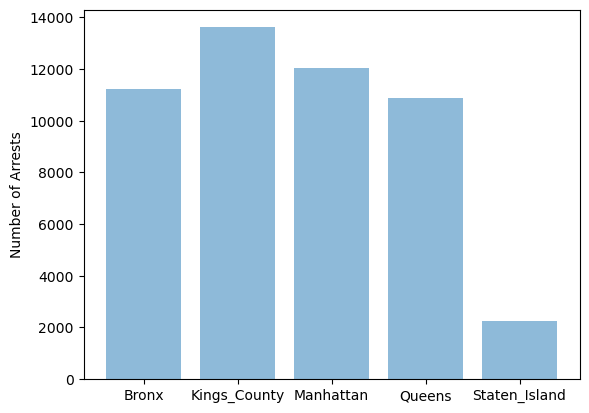

In [ ]:
plt.bar(x_axis, arrest, align='center', alpha=0.5)
plt.xticks(x_axis, boroughs)
plt.ylabel('Number of Arrests')
plt.show()


In [ ]:
c = pd.read_csv("./final_census_df.csv")
c.head()

,zip_code,population,poverty_rate,median_income
0,601,17242,62.475351,13092
1,602,38442,51.014515,16358
2,603,48814,49.856599,16603
3,606,6437,64.672984,12832
4,610,27073,43.305138,19309
